# HSE Машинное обучение и майнинг данных

## Семинар 6 Часть 2: Задачи классификации


### Екатерина Кондратьева

# Оценка качества алгоритмов машинного обучения. Кросс-валидация. 

![](attrition.jpg)

Мы попробуем на данных из Kaggle обучить модель машинного обучения, которая будет предсказывать отток сотрудников.
https://www.kaggle.com/patelprashant/employee-attrition

In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

**Шаг 1.2. Загрузим данные**

In [85]:
training_data = pd.read_csv('training_data.csv')

Посмотрим на данные 

In [86]:
training_data.shape

(3308, 20)

In [87]:
training_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,Research Scientist,Single,41890,0.0,23,8,1,6.0,3,5,1,4,1
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4,0


In [88]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3308.0,36.879383,9.146506,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,3308.0,9.201935,8.078147,1.0,2.0,7.0,14.0,29.0
Education,3308.0,2.918380,1.024933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,3308.0,64594.903265,46744.260986,10090.0,29040.0,49070.0,83210.0,199990.0
NumCompaniesWorked,3293.0,2.703310,2.506197,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,3308.0,15.230048,3.672812,11.0,12.0,14.0,18.0,25.0
StandardHours,3308.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,3308.0,0.804716,0.860350,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,3301.0,11.283248,7.791024,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,3308.0,2.801995,1.290718,0.0,2.0,3.0,3.0,6.0


Из таких характеристик столбцов мы уже можем извлечь некоторую информацию о данных:
* **Attrition** среднее 0.160. Значит, в нашей выборке только 16% сотрудников ушли из компании.
* **MonthlyIncome** существенно отличается масштаб значений: минимальное значение дохода - 10090, максимальное - 199990.
* **NumCompaniesWorked** и **TotalWorkingYears** есть пропуски.

## 2. Обработать данные перед обучением модели

In [89]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
Age                        3308 non-null int64
BusinessTravel             3308 non-null object
Department                 3308 non-null object
DistanceFromHome           3308 non-null int64
Education                  3308 non-null int64
EducationField             3308 non-null object
Gender                     3308 non-null object
JobRole                    3308 non-null object
MaritalStatus              3308 non-null object
MonthlyIncome              3308 non-null int64
NumCompaniesWorked         3293 non-null float64
PercentSalaryHike          3308 non-null int64
StandardHours              3308 non-null int64
StockOptionLevel           3308 non-null int64
TotalWorkingYears          3301 non-null float64
TrainingTimesLastYear      3308 non-null int64
YearsAtCompany             3308 non-null int64
YearsSinceLastPromotion    3308 non-null int64
YearsWithCurrManager       3308 non-n

**Заполнение пропусков**

Рассчитаем средние значения признаков в обучающей выборке, и заполним полученными
числами пропуски как в **тестовом наборе** данных, так и в **самой обучающей выборке**.

Мы будем заполнять средними значениями из обучающей выборки, так как при решении реальной задачи нам будут доступны только данные для обучения.

Для получения средних значений вызовем метод **`mean()`**. По умолчанию метод считает средним значения по столбцам. После выполнения ячейки средние значения записаны в переменной *`train_mean`*



In [90]:
train_mean = training_data.median()
train_mean

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49070.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
Attrition                      0.0
dtype: float64

In [91]:
training_data.fillna(train_mean, inplace=True)

## Распределение таргетов в выборке

In [92]:
target_variable_name = 'Attrition'

In [93]:
training_values = training_data[target_variable_name]

In [94]:
training_data[target_variable_name].value_counts()

0    2778
1     530
Name: Attrition, dtype: int64

In [95]:
beta = 530/2778
print(beta)

0.19078473722102232


Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. Для это нужно у переменной *`training_data`* вызвать метод **`drop()`**.

In [96]:
training_points = training_data.drop(target_variable_name, axis=1)

In [97]:
training_points.shape

(3308, 19)

Видно, что столбца действительно нет, а количество строк не изменилось. 

## 3. Загрузить и предобработать данные для тестирования

In [98]:
test_data = pd.read_csv('test_data.csv')

In [99]:
test_data.fillna(train_mean, inplace=True)

#### Почему мы заполняем переменной из `train_data`?

In [100]:
test_values = test_data[target_variable_name]

Отделим переменные для модели от выходной переменной (целевой). Для это нужно у переменной *`test_data`* нужно вызвать метод **`drop()`**.

In [101]:
test_points = test_data.drop(target_variable_name, axis=1)

И проверяем результат записанный в test_points

In [102]:
test_points.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,32,Travel_Rarely,Sales,10,3,Marketing,Female,Human Resources,Married,30720,5.0,12,8,0,9.0,4,5,1,3
1,52,Travel_Frequently,Research & Development,1,1,Life Sciences,Male,Laboratory Technician,Married,50060,3.0,16,8,1,31.0,2,9,0,0
2,37,Travel_Rarely,Sales,24,2,Life Sciences,Female,Laboratory Technician,Divorced,42570,4.0,15,8,0,9.0,2,1,0,0
3,28,Travel_Rarely,Research & Development,21,4,Life Sciences,Female,Healthcare Representative,Divorced,25000,1.0,16,8,2,6.0,3,5,0,4
4,22,Travel_Rarely,Research & Development,2,2,Life Sciences,Male,Sales Representative,Married,11020,6.0,19,8,0,4.0,3,2,2,2


In [103]:
test_points['Department'].value_counts()

Research & Development    706
Sales                     342
Human Resources            54
Name: Department, dtype: int64

##  Обработаем текстовые переменные

 будем использовать самый простой метод **LabelEncoder()** из библиотеки **sklearn**. 

In [104]:
# Тут мог быть OneHotEncoder():

one_hot_encoded_training_predictors = pd.get_dummies(training_points)
one_hot_encoded_test_predictors = pd.get_dummies(test_points)
training_points, test_points = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors, join='left', axis=1)

In [105]:
training_points

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,131160,1.0,11,8,0,1.0,6,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,41890,0.0,23,8,1,6.0,3,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,193280,1.0,15,8,3,5.0,2,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,83210,3.0,11,8,3,13.0,5,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,23420,4.0,12,8,2,9.0,2,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,36,10,4,86860,1.0,13,8,0,18.0,2,...,0,1,0,0,0,0,0,0,1,0
3304,32,3,4,30380,2.0,20,8,0,8.0,3,...,0,0,0,0,0,1,0,1,0,0
3305,30,4,5,30580,9.0,14,8,1,10.0,2,...,0,0,0,0,0,0,1,1,0,0
3306,53,6,3,23250,7.0,18,8,1,35.0,1,...,0,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
training_points['BusinessTravel'].value_counts()

Travel_Rarely        2352
Travel_Frequently     624
Non-Travel            332
Name: BusinessTravel, dtype: int64

In [24]:
text_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

Сперва создаем прототип кодировщика: 

In [25]:
label_encoder = LabelEncoder()

In [26]:
for col in text_features:
    training_points[col] = label_encoder.fit_transform(training_points[col])
    test_points[col] = label_encoder.transform(test_points[col])

Посмотрим на данные теперь:

In [27]:
training_points.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,0,1,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,6,2,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,7,1,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,1,1,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,7,2,23420,4.0,12,8,2,9.0,2,6,0,4


In [28]:
training_points.shape

(3308, 19)

### Корреляции?

In [29]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k = 5)

X = skb.fit_transform(training_points,training_values)

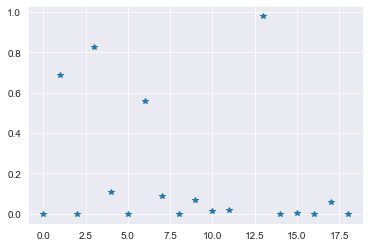

In [33]:
plt.plot(skb.pvalues_,  '*');

In [37]:
X.shape

(3308, 5)

In [38]:
X = pd.DataFrame(X)

In [39]:
import scipy

scipy.stats.pearsonr(X[X.columns[0]], training_values)

(-0.16221706816562537, 6.076256942316203e-21)

## 2.1 Метрика

Какую будем использовать метрику?

## 2.2 Baseline model 

In [41]:
logistic_regression_model = LogisticRegression() # создаем модель

In [42]:
logistic_regression_model.fit(training_points, training_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Провалидировать модель на тестовой выборке

In [43]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, fbeta_score

In [45]:
print(f1_score(test_values, test_predictions_logistic_regression))

0.0


In [46]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.8357531760435571


In [47]:
logistic_regression_model.fit(X, training_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Как видно, значения точности для логистической регрессии равно точности для контстантного классификатора. И на самом деле, модель логистической регресси предсказывает только класс 0:

In [48]:
pd.value_counts(test_predictions_logistic_regression)

0    1102
dtype: int64

## 2.3 Проведем поиск модели

In [49]:
random_state = 42

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.svm import SVC
svc= SVC(random_state= random_state)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= random_state)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= random_state)

In [50]:
from sklearn.metrics import accuracy_score

models = [knn, svc, rfc, lr]

for model in models:
    model.fit(training_points, training_values)# fit the model
    predictions = model.predict(test_points)
    print(str(model)[:10], f1_score(test_values, predictions))   

KNeighbors 0.3942652329749104
SVC(C=1.0, 0.9972299168975068
RandomFore 0.9972299168975068
LogisticRe 0.0


### Посмотрим лучшие модели на кросс-валидации:

In [51]:
from sklearn.model_selection import StratifiedKFold

In [55]:
kfold = StratifiedKFold(n_splits= 20, random_state= random_state)# проверить 20 фолдов


list_1 = []  # обозначим пустой лист, куда будем записывать точность после каждой итерации
list_2 = []

X = np.asarray(training_points)
y = np.asarray(training_values)

i = 0

for train_index, test_index in kfold.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]  # срежем массив по нужным индексам, индексы выбираются в функции kfold
    y_train, y_test = y[train_index], y[test_index]
    
    svc.fit(X_train,y_train)
    rfc.fit(X_train,y_train)
    
    list_1.append(f1_score(svc.predict(X_test),y_test))
    list_2.append(f1_score(rfc.predict(X_test),y_test))
    
    print('Fold #', i)
    i += 1  # следующая итерации

Fold # 0
Fold # 1
Fold # 2
Fold # 3
Fold # 4
Fold # 5
Fold # 6
Fold # 7
Fold # 8
Fold # 9
Fold # 10
Fold # 11
Fold # 12
Fold # 13
Fold # 14
Fold # 15
Fold # 16
Fold # 17
Fold # 18
Fold # 19


In [56]:
np.mean(list_1),  np.mean(list_2)

(0.9961524232334442, 0.9483338122483037)

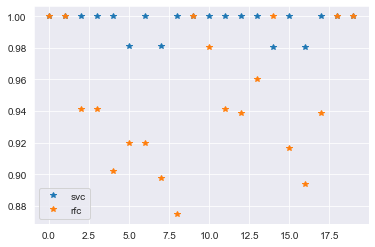

In [57]:
plt.plot(list_1, "*")
plt.plot(list_2,"*")
plt.legend(['svc', 'rfc']);

### Будем улучшать модель SVC

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
# все делаем теперь по красоте, нам нужен лучший скор
pipe = Pipeline([('standardizer', scaler), ('svc', svc)])


# Сетка
search_space = [{'svc__C': [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#                 'svc__kernel': ['linear', 'rbf','poly']
#                 'svc__probability': [True], # нужно поставить, чтобы обратиться к `predict_proba`
                }]
# Поиск по сетке
clf = GridSearchCV(pipe, search_space, cv=5, scoring = 'f1').fit(X, y)# а если сразу оптимизировать скоринг f1?

In [79]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('standardizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## 3. Тестируем модель на отложенных данных

In [89]:
f1_score(test_values, clf.best_estimator_.predict(test_points))

0.9627507163323783

In [80]:
f1_score(test_values, clf.best_estimator_.predict(test_points))

0.9627507163323783

In [90]:
clf.best_estimator_.fit(training_points, training_values)# fit the model
predictions = clf.best_estimator_.predict(test_points)
print( f1_score(test_values, predictions))   

0.9627507163323783


# 4. Интерпретация. Посмотрим на вероятности принадлежности к классу

Вместо прогноза меток классов модель может с помощью метода **`predict_proba()`** выдавать метки вероятности принадлежности к классам.
Так как класса у нас 2: сотрудники, которые ушли и которые продолжили работать, то матрица будет размером **(количество объектов в тестовой выборке, 2)**.

In [103]:
test_probabilities = clf.best_estimator_.predict_proba(test_points)
test_predictions = clf.best_estimator_.predict(test_points)

Посмотрим на первые пять значений этой матрицу: 

In [98]:
test_probabilities[:5, :]

array([[0.97534005, 0.02465995],
       [0.98651454, 0.01348546],
       [0.9397819 , 0.0602181 ],
       [0.97565449, 0.02434551],
       [0.93981719, 0.06018281]])

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [99]:
test_probabilities = test_probabilities[:, 1]

Посмотрим на распределение предсказанной классификатором вероятности ухода сотрудника, метки `1`.

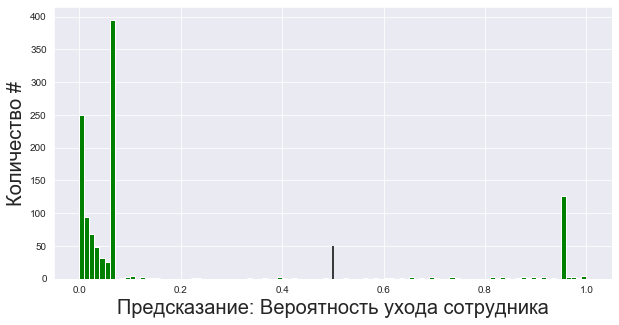

In [100]:
plt.figure(figsize=(10, 5))

plt.hist(test_probabilities, bins = 100, color= 'green')
plt.vlines(0.5, 0, 50)

plt.xlabel('Предсказание: Вероятность ухода сотрудника', fontsize=20)
plt.ylabel('Количество #', fontsize=20);

![](precision_recall.png)

In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_values, test_predictions)

array([[921,   0],
       [ 13, 168]], dtype=int64)

### Наша лучшая модель нелинейная (ядро `rbf`). 
Можем интерпретировать RFC

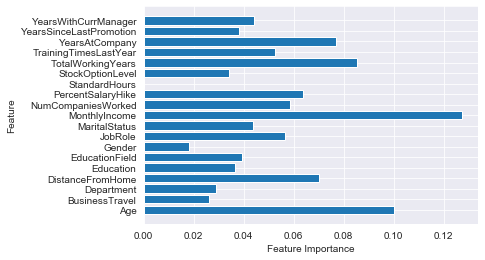

In [108]:
n_feature = X.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), training_points.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
training_data['Age'][training_data['Attrition'] == 0].mean()

37.52735781137509

In [70]:
training_data['Age'][training_data['Attrition'] == 1].mean()

33.48301886792453

### Каковы наши шансы в `kaggle` сравним с существующими ядрами:

https://www.kaggle.com/patelprashant/employee-attrition/kernels
    